# Load necessary packages

In [5]:
#File management
import os

#CSV files
import pandas as pd

# Optional: load matplotlib for testing purposes

In [39]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

# Create a dictionary to change the method of determining Train/Test split

"method" is determines the style to determine the test set
- if "method" == "gen"
    - "num" specifies which gen is the test set

In [43]:
method = {}
method["method"] = "gen"
#num indicates the test set generation
method["num"] = 5

# Select which folders to gather train/test data from

Can specify folders or default to all folders

In [45]:
data_folder = os.path.join(os.getcwd(),"data")

all_gen_folders = sorted([f for f in os.listdir(data_folder) if not f.startswith(".")])

# !! ALTERNATIVE !!: replace all_gen_folders with specific folders
# Comment out the following line to automatically add all images from the data folder
all_gen_folders = ["rby","gsc","rse","dpp","bw"]

print("Data folders to consider :: ", all_gen_folders)

Data folders to consider ::  ['rby', 'gsc', 'rse', 'dpp', 'bw']


# Create "Train.csv" and "Test.csv"

- Train_list and Test_list are lists of dictionaries, where each dictionary represents a row of data
- After the lists are fully assembled, the lists are converted into panda dataframes for easy CSV conversion
- The list+dictionary approach is done for SIGNIFICANTLY faster read/write times

In [46]:
train_list = []
test_list = []

for folder in all_gen_folders:
    gen_folder = os.path.join(data_folder, folder)
    
    #Read the master list csv file from each folder
    gen_df = pd.read_csv(os.path.join(gen_folder, "aa_masterlist.csv"))
    gen_list = gen_df.to_dict(orient="records")
    
    #Use the "gen" criteria to determine train/test split
    if(method["method"] == "gen"):
        #Gen numbers represent the bounds of the pokedex numbers (check bulbapedia, ya nerd)
        num = method["num"]
        #Note: bounds are inclusive
        if num == 1:
            min_bnd = 1
            max_bnd = 151
            
        elif num == 2:
            min_bnd = 152
            max_bnd = 251
            
        elif num == 3:
            min_bnd = 252
            max_bnd = 386
            
        elif num == 4:
            min_bnd = 387
            max_bnd = 493
            
        elif num == 5:
            min_bnd = 494
            max_bnd = 649
            
        elif num == 6:
            min_bnd = 650
            max_bnd = 721
            
        elif num == 7:
            min_bnd = 722
            max_bnd = 809
            
        else:
            print("This generation doesn't exist at the time of the creation of this code")
            print("Please manually add the generation index to the if/else case")
            raise ValueError("The Generation doesn't exist")
            
        
        #Add the dictionary row element to the appropriate list (train or test)
        for i in range(0, len(gen_list)):
            #
            #!NOTE!: Pokemon name is replaced with the file location
            #
            gen_list[i]["pokemon"] = os.path.join(gen_folder, gen_list[i]["pokemon"])
            dex_num = gen_list[i]["dex_number"]
            
            if dex_num >= min_bnd and dex_num <= max_bnd:
                test_list.append(gen_list[i])
            else:
                train_list.append(gen_list[i])

#Convert the lists into pandas dataframes, and then write to the /data folder
train_df = pd.DataFrame(train_list, columns=list(gen_df))
train_df.sort_values("dex_number", inplace = True, ascending = True)
write_train = train_df.to_csv(os.path.join(data_folder, "Train.csv"), encoding="utf-8", index=False)

test_df = pd.DataFrame(test_list, columns=list(gen_df))
test_df.sort_values("dex_number", inplace = True, ascending = True)
write_test = test_df.to_csv(os.path.join(data_folder, "Test.csv"), encoding="utf-8", index=False)

# Test if the Train Set loads images properly

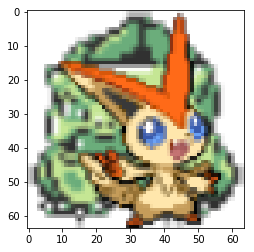

In [47]:
train_df = pd.read_csv(os.path.join(data_folder, "Train.csv"))
test_df = pd.read_csv(os.path.join(data_folder, "Test.csv"))

train_str = train_df["pokemon"].iloc[0]
train_img = mpimg.imread(train_str)
plt.imshow(train_img)

test_str = test_df["pokemon"].iloc[0]
test_img = mpimg.imread(test_str)
plt.imshow(test_img)

# Garbage Code below! Do not run :)

In [30]:
print(gen_df)
print(list(gen_df))

            pokemon  dex_number  normal  fighting  flying  poison  ground  \
0     bulbasaur.png           1       0         0       0       1       0   
1       ivysaur.png           2       0         0       0       1       0   
2      venusaur.png           3       0         0       0       1       0   
3    charmander.png           4       0         0       0       0       0   
4    charmeleon.png           5       0         0       0       0       0   
5     charizard.png           6       0         0       1       0       0   
6      squirtle.png           7       0         0       0       0       0   
7     wartortle.png           8       0         0       0       0       0   
8     blastoise.png           9       0         0       0       0       0   
9      caterpie.png          10       0         0       0       0       0   
10      metapod.png          11       0         0       0       0       0   
11   butterfree.png          12       0         0       1       0       0   